In [1]:
# !pip install ipyfilechooser

# show the used python env
import sys
sys.executable

'C:\\Users\\m1srh\\Miniconda3\\envs\\napari-src\\python.exe'

In [2]:
# import the required libraries
#from aicspylibczi import CziFile
#from czitools import czi_metadata as czimd_aics
from czitools import pylibczirw_metadata as czimd
from czitools import pylibczirw_tools as czird
from czitools import misc, napari_tools
from ipyfilechooser import FileChooser
from IPython.display import display, HTML
import napari

In [3]:
defaultdir = r"D:\Testdata_Zeiss\CZI_Testfiles"
fc = FileChooser(defaultdir)
fc.filter_pattern = '*.czi'
display(fc)

FileChooser(path='D:\Testdata_Zeiss\CZI_Testfiles', filename='', title='', show_hidden=False, select_desc='Sel…

In [4]:
# Print the selected path, filename, or both
print(fc.selected_path)
print(fc.selected_filename)
print(fc.selected)

D:\Testdata_Zeiss\CZI_Testfiles
CellDivision_T=15_Z=20_CH=2_DCV.czi
D:\Testdata_Zeiss\CZI_Testfiles\CellDivision_T=15_Z=20_CH=2_DCV.czi


In [5]:
# get only specific metadata
czi_dimensions = czimd.CziDimensions(fc.selected)
print("SizeS: ", czi_dimensions.SizeS)
print("SizeT: ", czi_dimensions.SizeT)
print("SizeZ: ", czi_dimensions.SizeZ)
print("SizeC: ", czi_dimensions.SizeC)
print("SizeY: ", czi_dimensions.SizeY)
print("SizeX: ", czi_dimensions.SizeX)

SizeS:  None
SizeT:  15
SizeZ:  20
SizeC:  2
SizeY:  700
SizeX:  700


In [6]:
# and get more info
czi_scaling = czimd.CziScaling(fc.selected)
czi_channels = czimd.CziChannelInfo(fc.selected)
czi_bbox = czimd.CziBoundingBox(fc.selected)
czi_info = czimd.CziInfo(fc.selected)
czi_objectives = czimd.CziObjectives(fc.selected)
czi_detectors = czimd.CziDetector(fc.selected)
czi_microscope = czimd.CziMicroscope(fc.selected)
czi_sample = czimd.CziSampleInfo(fc.selected)

No Objective Name : 'Name'
No Objective ID : 'Id'
DetectorID not found : 'Id'
DetectorName not found : 'Name'
DetectorType not found : 'Type'
Microscope System Name not found : 'System'
No valid Scene or Well information found: 'SizeS'


In [7]:
# get the complete metadata at once as one big class
mdata = czimd.CziMetadata(fc.selected)

# get the CZI metadata dictionary directly from filename
mdict = czimd.create_mdict_complete(fc.selected, sort=False)

# convert metadata dictionary to a pandas dataframe
mdframe = misc.md2dataframe(mdict)

# and display it nicely as a HTML inside the jupyter notebook
display(HTML(mdframe.to_html()))

No Objective Name : 'Name'
No Objective ID : 'Id'
DetectorID not found : 'Id'
DetectorName not found : 'Name'
DetectorType not found : 'Type'
Microscope System Name not found : 'System'
No valid Scene or Well information found: 'SizeS'
No Objective Name : 'Name'
No Objective ID : 'Id'
DetectorID not found : 'Id'
DetectorName not found : 'Name'
DetectorType not found : 'Type'
Microscope System Name not found : 'System'
No valid Scene or Well information found: 'SizeS'


,Parameter,Value
0,Directory,D:\Testdata_Zeiss\CZI_Testfiles
1,Filename,CellDivision_T=15_Z=20_CH=2_DCV.czi
2,AcqDate,2016-02-12T09:41:02.4915604Z
3,SW-Name,ZEN 3.1 (blue edition)
4,SW-Version,3.1.0.0000
5,aics_dims,BTCZYX
6,aics_dims_shape,"[{'X': (0, 700), 'Y': (0, 700), 'Z': (0, 20), 'C': (0, 2), 'T': (0, 15), 'B': (0, 1)}]"
7,aics_size,"(1, 15, 2, 20, 700, 700)"
8,aics_ismosaic,False
9,aics_dim_order,"{'R': -1, 'I': -1, 'M': -1, 'H': -1, 'V': -1, 'B': 0, 'S': -1, 'T': 1, 'C': 2, 'Z': 3, 'Y': 4, 'X': 5, 'A': -1}"


In [8]:
# write XML to disk
xmlfile = misc.writexml_czi(fc.selected)
print("XML File written to:", xmlfile)

XML File written to: D:\Testdata_Zeiss\CZI_Testfiles\CellDivision_T=15_Z=20_CH=2_DCV_CZI_MetaData.xml


In [9]:
# get the planetable for the CZI file
pt, csvfile = misc.get_planetable(fc.selected,
                                  norm_time=True,
                                  savetable=True,
                                  separator=',',
                                  index=True)

# and display it nicely as a HTML inside the jupyter notebook
display(HTML(pt.to_html()))
print("PlaneTable CSV File written to:", xmlfile)

No Objective Name : 'Name'
No Objective ID : 'Id'
DetectorID not found : 'Id'
DetectorName not found : 'Name'
DetectorType not found : 'Type'
Microscope System Name not found : 'System'
No valid Scene or Well information found: 'SizeS'


  0%|          | 0/600 [00:00<?, ?it/s]

,Subblock,Scene,Tile,T,Z,C,X[micron],Y[micron],Z[micron],Time[s],xstart,ystart,width,height
0,0,0,0,0,0,0,16977.153,18621.489,1112.570,0.000000,0,0,700,700
1,1,0,0,0,0,1,16977.153,18621.489,1112.570,0.323019,0,0,700,700
2,2,0,0,0,1,0,16977.153,18621.489,1112.890,0.900052,0,0,700,700
3,3,0,0,0,1,1,16977.153,18621.489,1112.890,1.224070,0,0,700,700
4,4,0,0,0,2,0,16977.153,18621.489,1113.210,1.796103,0,0,700,700
5,5,0,0,0,2,1,16977.153,18621.489,1113.210,2.120122,0,0,700,700
6,6,0,0,0,3,0,16977.153,18621.489,1113.530,2.696154,0,0,700,700
7,7,0,0,0,3,1,16977.153,18621.489,1113.530,3.051175,0,0,700,700
8,8,0,0,0,4,0,16977.153,18621.489,1113.850,3.618207,0,0,700,700
9,9,0,0,0,4,1,16977.153,18621.489,1113.850,3.946226,0,0,700,700


PlaneTable CSV File written to: D:\Testdata_Zeiss\CZI_Testfiles\CellDivision_T=15_Z=20_CH=2_DCV_CZI_MetaData.xml


In [12]:
# return array with dimension order STZCYXA
mdarray, dimstring = czird.read_mdarray(fc.selected)

# remove A dimension do display the array inside Napari
dim_order, dim_index, dim_valid = czimd.CziMetadata.get_dimorder(dimstring)

No Objective Name : 'Name'
No Objective ID : 'Id'
DetectorID not found : 'Id'
DetectorName not found : 'Name'
DetectorType not found : 'Type'
Microscope System Name not found : 'System'
No valid Scene or Well information found: 'SizeS'


  0%|          | 0/600 [00:00<?, ?it/s]

In [13]:
# show array inside napari viewer
viewer = napari.Viewer()
layers = napari_tools.show(viewer, mdarray, mdata,
                           dim_order=dim_order,
                           blending="additive",
                           contrast='napari_auto',
                           gamma=0.85,
                           add_mdtable=True,
                           name_sliders=True)

Adding Channel  : LED555
Shape Channel   : 0 (1, 15, 20, 1, 700, 700)
Scaling Factors : [1.0, 1.0, 3.516, 1.0, 1.0]
Adding Channel  : LED470
Shape Channel   : 1 (1, 15, 20, 1, 700, 700)
Scaling Factors : [1.0, 1.0, 3.516, 1.0, 1.0]
Rename Sliders based on the Dimension String ....


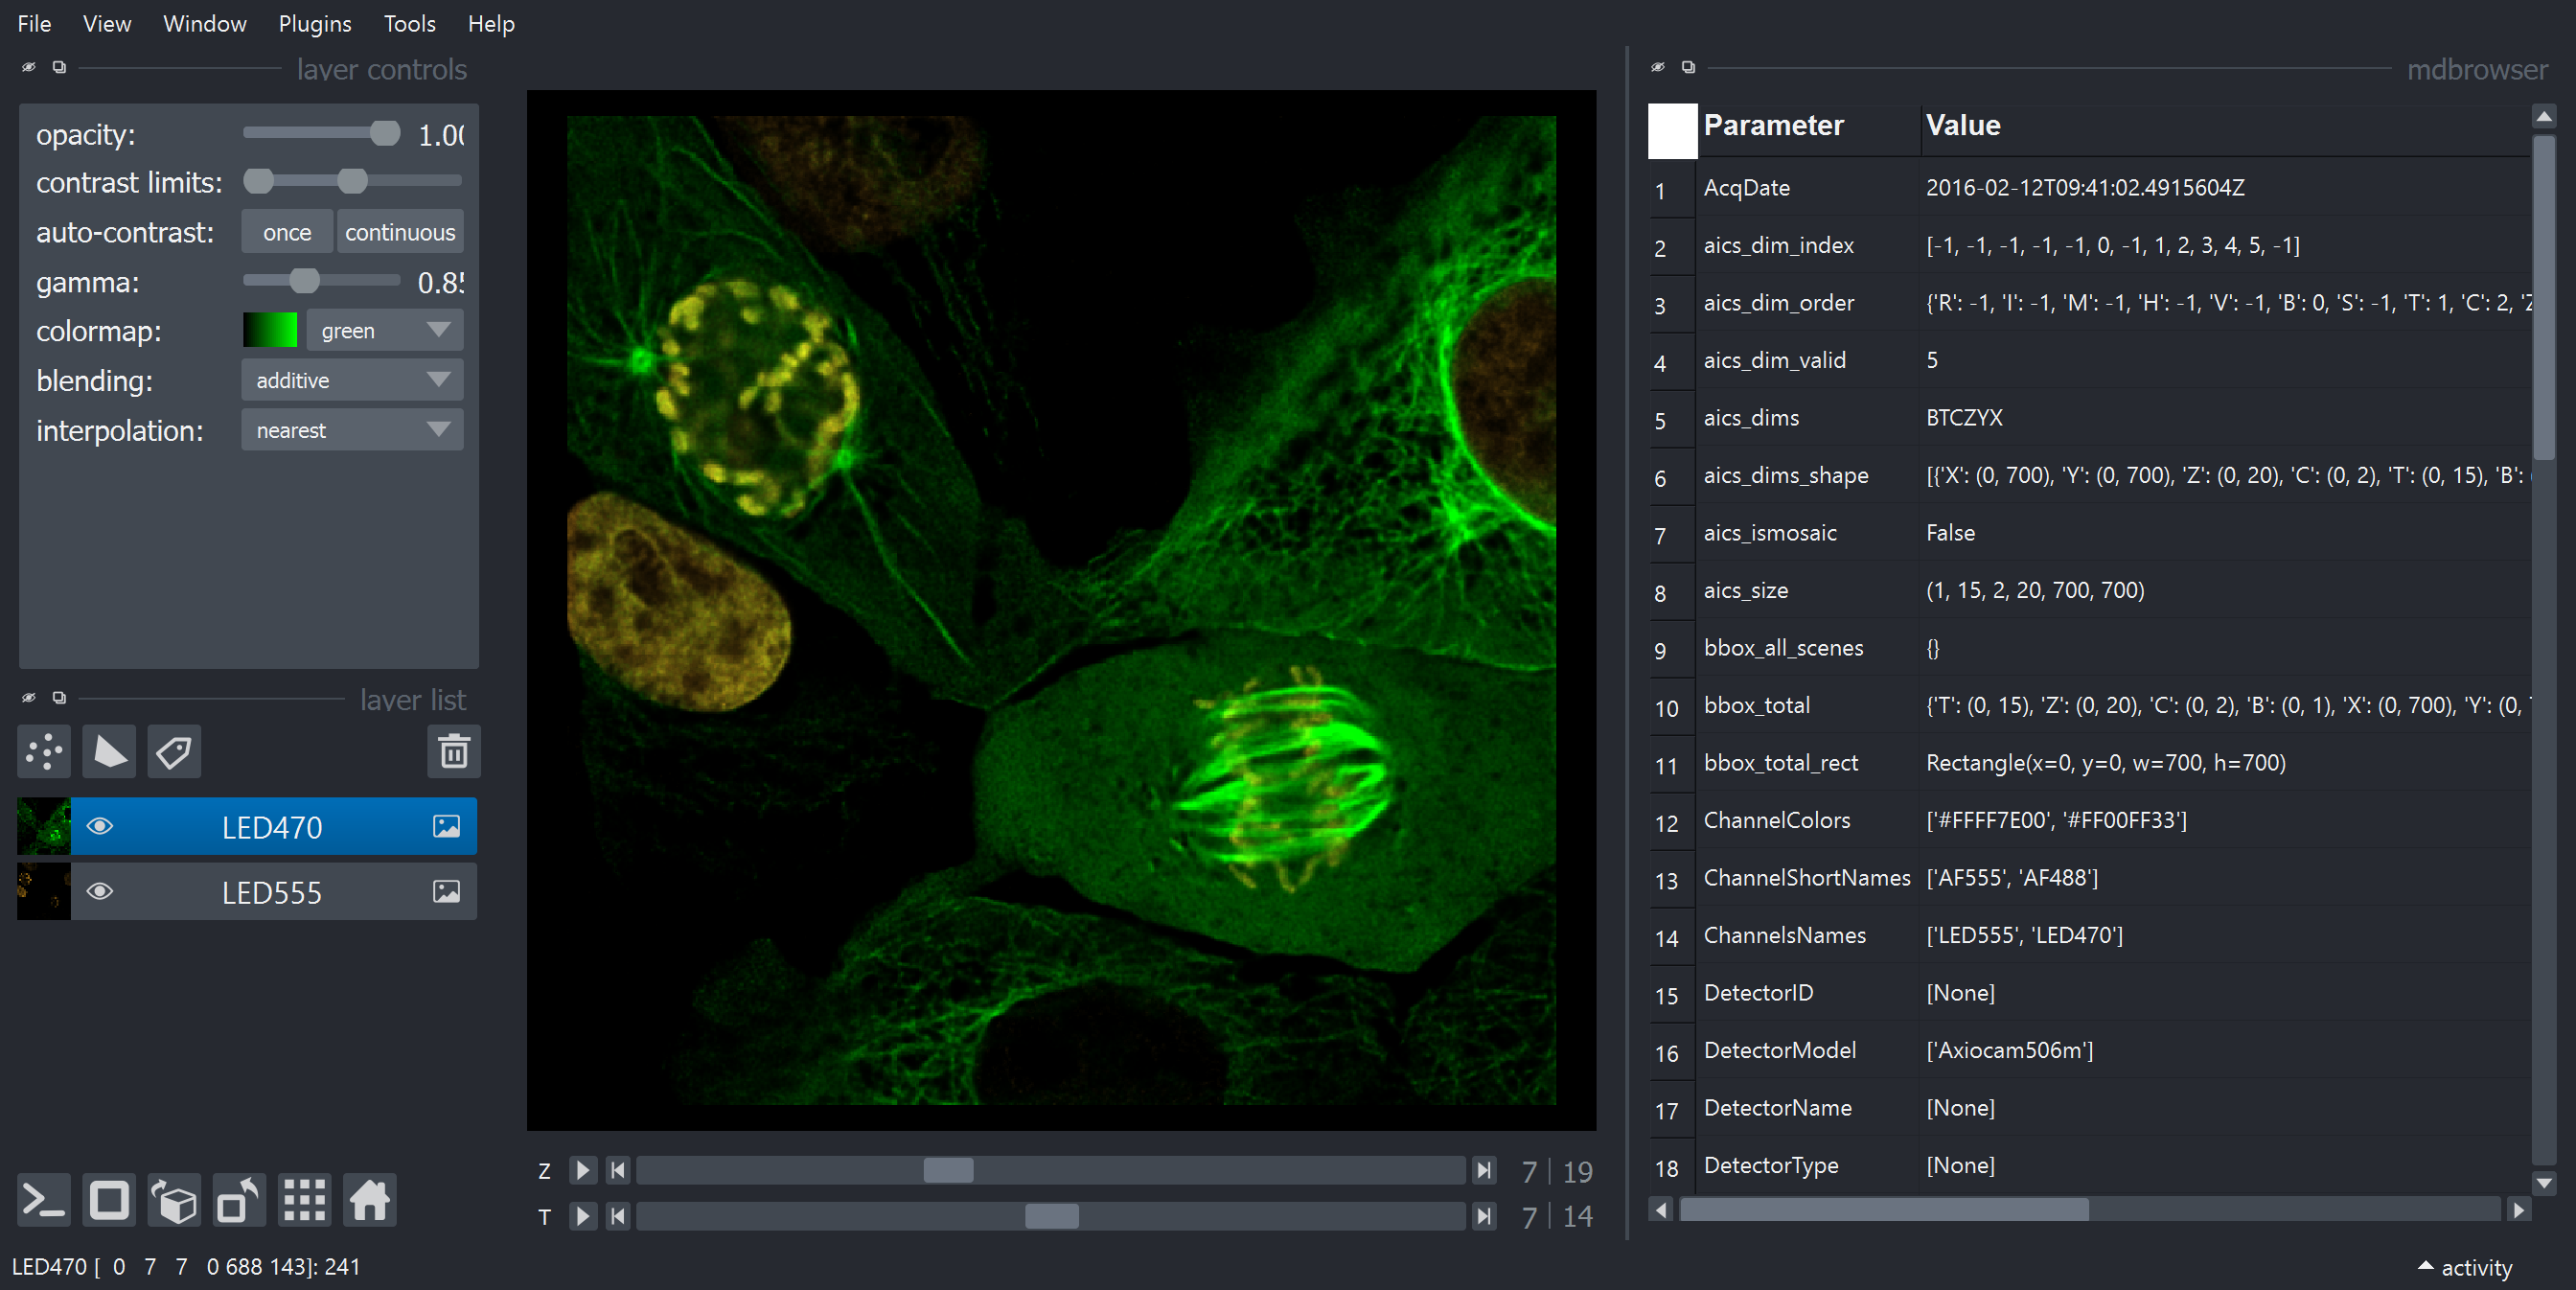

In [14]:
napari.utils.nbscreenshot(viewer)